# Module 1: Customer Address

## Load libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## FUNCTIONS

In [2]:
def disto_bars(colname, df):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing entries for {colname}.')

    # Plot distribution
    value_counts = df[colname].value_counts(dropna=False).sort_index()

    plt.figure()
    plt.bar(value_counts.index.astype(str), value_counts.values)
    #plt.text(value_counts.index.astype(str)[-1], value_counts.values[-1]+100, str(value_counts.values[1]), color='red')
    plt.xticks(rotation=90)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Counts per category')
    plt.show()

In [3]:
def disto_histo(colname, df, bins=30):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing values for {colname}.')
    # Histogram
    plt.figure()
    plt.hist(df[colname], bins)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Distribution of values for ' + colname)
    plt.show()

In [4]:
def sort_str_vals (colname, df):
    uq_jobs = df[colname].unique()
    # Get the indices to sort the array alphabetically, handling NaN values
    sorted_indices = np.argsort(np.array(uq_jobs, dtype=str))

    # Sort the ndarray based on the sorted indices
    sorted_array = uq_jobs[sorted_indices]

    # display
    return sorted_array

## Load data

In [5]:
custaddr = pd.read_csv('customeraddress.csv', skiprows=[0], index_col=0)
print('Table dimensions:', custaddr.shape)
display(custaddr.head())

Table dimensions: (3999, 6)


,customer_id,address,postcode,state,country,property_valuation
0,,,,,,
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


## Identify flaws

### Duplications

In [7]:
print('Number of duplicated rows:', custaddr.duplicated().sum())
print('Number of duplicated columns:', custaddr.T.duplicated().sum())

Number of duplicated rows: 0
Number of duplicated columns: 0


### `index` - `customer_id`

Check that `customer_id` is identical to the index of the table and drop customer ID if this is the case

In [11]:
custaddr.customer_id.duplicated().sum()

0

In [12]:
custaddr.set_index('customer_id', inplace=True)

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


### `address`

In [14]:
# Check for missing values
print('Missing values:', custaddr.address.isna().sum())

# Check for address patterns
address_pattern = r"^\d+\s[A-Za-z\s]+$"
all_match = custaddr['address'].str.match(address_pattern).all()
if all_match:
    print('All addresses are in the correct format.')
else:
    print('NOT all addresses are in the correct format.')

Missing values: 0
NOT all addresses are in the correct format.


In [16]:
# Obtain values that do not conform to the address format
address_diff_mask = ~custaddr['address'].str.match(address_pattern)
display(custaddr.loc[address_diff_mask,['address', 'state','country']])

,address,state,country
customer_id,,,
9,97736 7th Trail,New South Wales,Australia
18,092 2nd Alley,New South Wales,Australia
25,28 5th Center,QLD,Australia
60,39 3rd Drive,New South Wales,Australia
133,19392 7th Trail,QLD,Australia
210,19969 5th Parkway,VIC,Australia
230,4 5th Point,NSW,Australia
247,2 2nd Plaza,NSW,Australia
293,00 5th Lane,NSW,Australia


We can see that the addressed that were determined not to conform to the format are simply the numerical references to specific streets and will be left as they are.

### `postcode`

Ensure that all postal codes are composed of 4 digits

In [18]:
# Check for nulls
print(f'There are {custaddr.postcode.isna().sum()} missing values!')

# Check for correct pattern
post_pattern = r'^\d{4}$'
postcode_correct = custaddr['postcode'].astype(str).str.match(post_pattern).all()

if postcode_correct:
    print('All postcodes are in the correct format.')
else:
    print('NOT all postcodes are in the correct format.')

There are 0 missing values!
All postcodes are in the correct format.


### `state`

There are 0 missing entries for state.


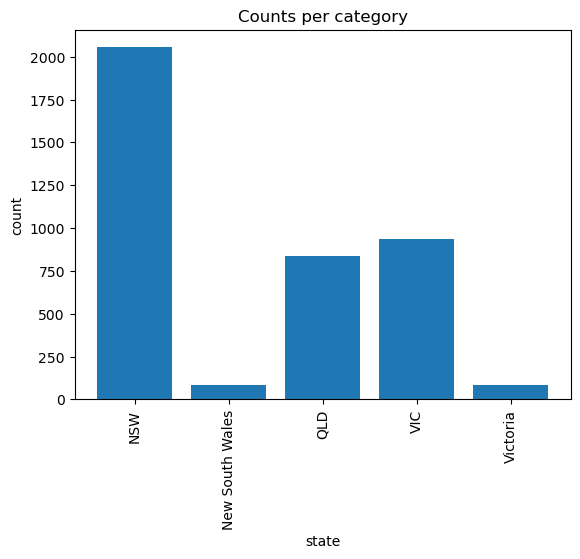

In [19]:
disto_bars('state', custaddr)

Some of the entries are fully spelled instead of using abbreviations. These values will be converted for the sake of consistencies.

There are 0 missing entries for state.


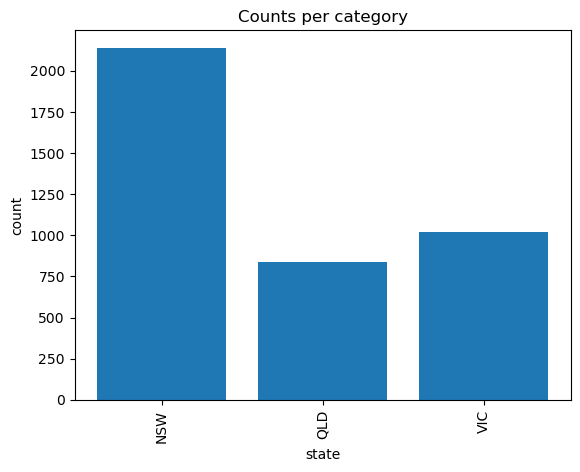

In [21]:
# Define replacements
repl_dict = {'New South Wales' : 'NSW',
             'Victoria' : 'VIC'
            }

# Replace
custaddr['state'].replace(repl_dict, inplace=True)

# Sanity check
disto_bars('state', custaddr)

### `country`

There are 0 missing entries for country.


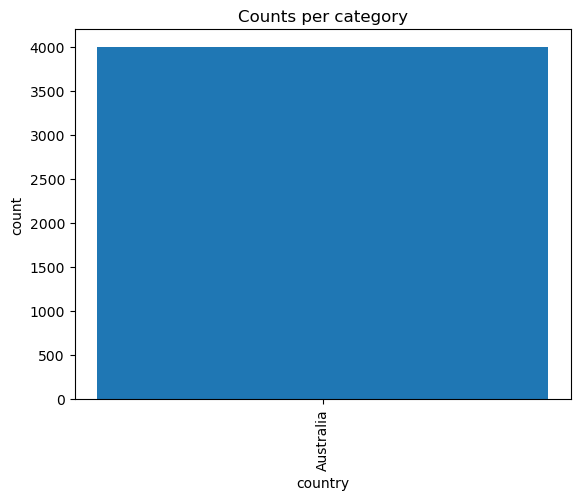

In [22]:
disto_bars('country', custaddr)

<div class="alert alert-danger">
    <strong>REMOVE:</strong> There are no missing values and everything is in order with this feature. However, all entries are annotated with the same category Australia, which makes this feature of little use in analysis/modelling since it does not bring any useful informaiton.
</div>

### `property_valuation`

There are 0 missing values for property_valuation.


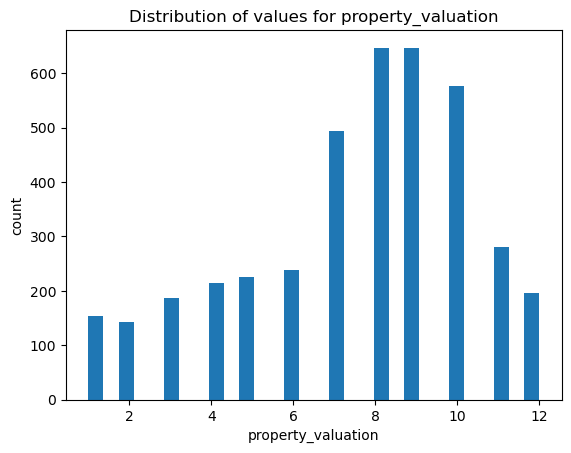

In [23]:
disto_histo('property_valuation', custaddr)

## Save

In [24]:
custaddr.to_csv('customeraddress_clean1.csv')

---